<a href="https://colab.research.google.com/github/Amiyakalo/Digit-Image-Classification/blob/main/digit_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

In [2]:
# Setup training data
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 127072122.68it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 6140915.23it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 77390127.98it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20752209.99it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
img = train_data[0][0]
label = train_data[0][1]
print(f"Image:\n {img}")
print(f"Label:\n {label}")

Image:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [6]:
# The shape of the image
img.shape

torch.Size([1, 28, 28])

In [7]:
# See classes
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## Visualizing our data

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

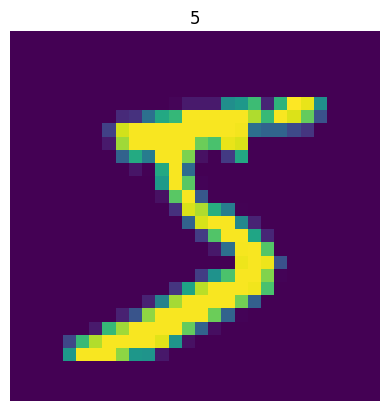

In [8]:
img, label = train_data[0]
print(f"Image shape: {img.shape}")
plt.imshow(img.squeeze())
plt.title(label)
plt.axis(False)

(-0.5, 27.5, 27.5, -0.5)

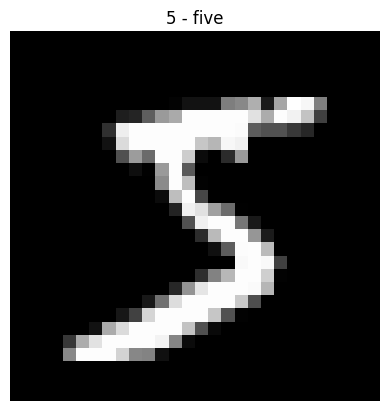

In [9]:
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

Image shape: torch.Size([1, 28, 28])
torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
torch.Size([28, 28])


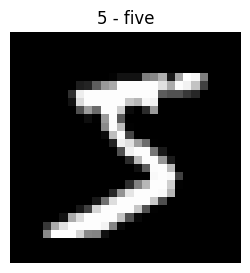

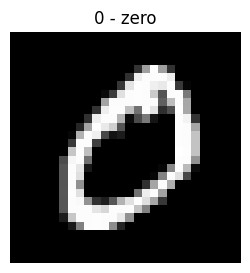

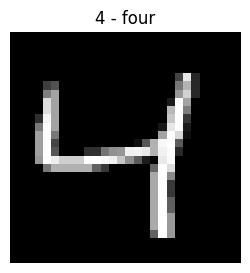

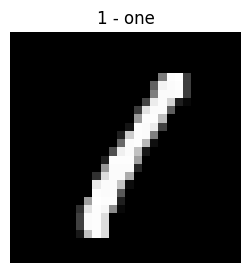

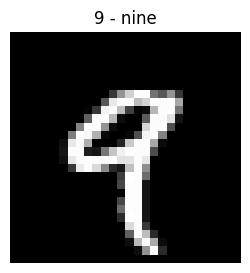

In [10]:
for i in range(5):
  img = train_data[i][0]
  print(f"Image shape: {img.shape}")
  img_squeeze = img.squeeze()
  print(img_squeeze.shape)
  label = train_data[i][1]
  plt.figure(figsize=(3,3))
  plt.imshow(img_squeeze, cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of 32")
print(f"Length of test dataloader: {len(test_dataloader)} batchers of 32")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c262685ff10>, <torch.utils.data.dataloader.DataLoader object at 0x7c262685ffa0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batchers of 32


In [14]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [15]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [22]:
class MNISTModel(nn.Module):
  def __init__(self, input_shape : int, hidden_units : int, output_shape : int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features = output_shape)
    )

  def forward(self, x : torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model = MNISTModel(input_shape = 1,
                    hidden_units = 10,
                    output_shape = len(class_names)).to(device)
model


MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [23]:
try:
  from torchmetrics import Accuracy
except:
  !pip install torchmetrics
  from torchmetrics import Accuracy

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                                    lr = 0.1)
acc_fn = Accuracy(task = "multiclass", num_classes = 10).to(device)

In [24]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               acc_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.to(device)

  for batch , (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += acc_fn(y_pred.argmax(dim = 1), y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss: .5f} | Train accuracy: {train_acc:.2f}%")

In [25]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              acc_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      test_loss += loss
      test_acc += acc_fn(y_pred.argmax(dim = 1), y)

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

In [26]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_model = timer()

from tqdm.auto import tqdm
epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model = model,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             acc_fn = acc_fn,
             device = device)

  test_step(model = model,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            acc_fn = acc_fn,
            device = device)

train_time_end_model = timer()

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Training time {device} : {total_time:.3f} seconds")
  return total_time


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss:  0.33474 | Train accuracy: 0.89%
Test loss: 0.07208 | Test accuracy: 0.98%
Epoch: 1
----------
Train loss:  0.08216 | Train accuracy: 0.97%
Test loss: 0.07453 | Test accuracy: 0.98%
Epoch: 2
----------
Train loss:  0.06431 | Train accuracy: 0.98%
Test loss: 0.05811 | Test accuracy: 0.98%
Epoch: 3
----------
Train loss:  0.05557 | Train accuracy: 0.98%
Test loss: 0.05703 | Test accuracy: 0.98%
Epoch: 4
----------
Train loss:  0.04924 | Train accuracy: 0.98%
Test loss: 0.04667 | Test accuracy: 0.98%


In [29]:
model_pred_logits = model(test_data[0][0].unsqueeze(dim=0).to(device))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

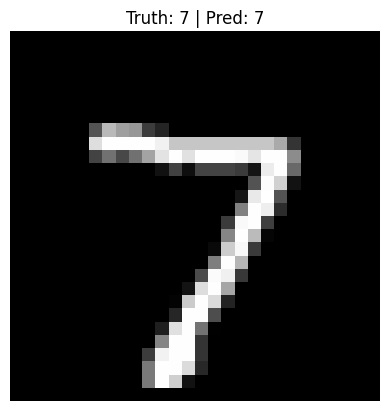

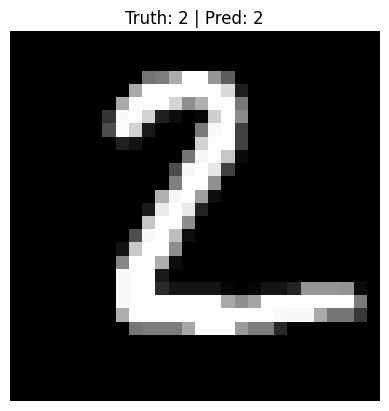

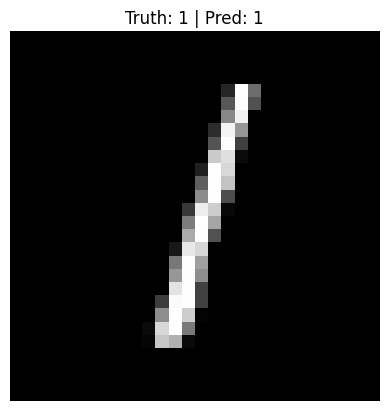

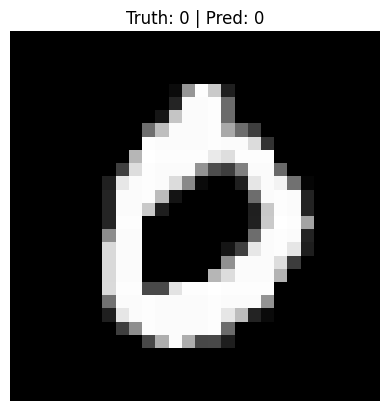

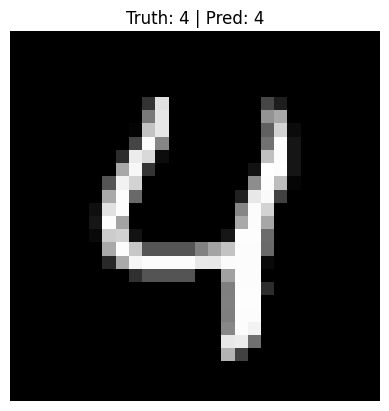

In [32]:
for i in range(5):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False)

In [33]:
# See if torchmetrics exists, if not, install it
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19
except:
  !pip install -q trochmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [37]:
model.eval()
y_preds = []

with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    X, y = X.to(device), y.to(device)
    y_pred_logits = model(X)
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    y_preds.append(y_pred_labels)

  y_preds=torch.cat(y_preds).cpu()

len(y_preds)

0it [00:00, ?it/s]

10000

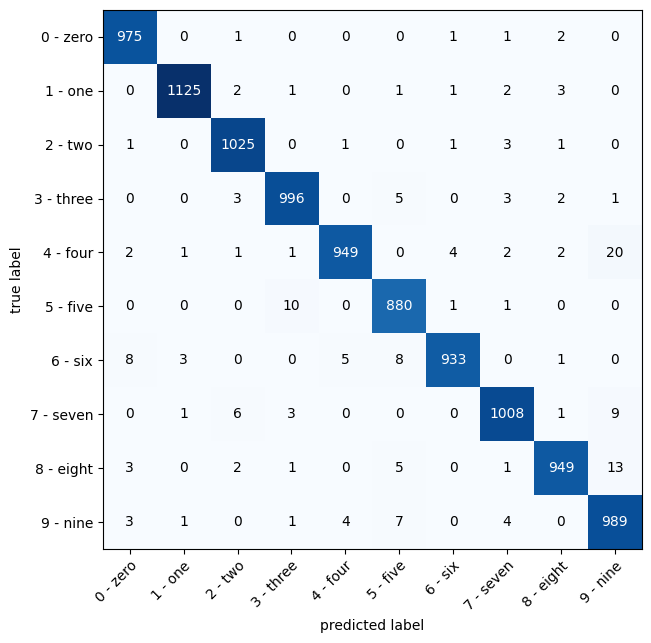

In [38]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)
